In [1]:
#libraries for data analysis
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [2]:
#import the User Datasets
xls = pd.ExcelFile('Browser_Conversions.xlsx')
Chrome = pd.read_excel(xls, 'Chrome')
Safari = pd.read_excel(xls, 'Safari')
Ie = pd.read_excel(xls, 'Internet Explorer')

### Only Chrome Safari and Internet Explorer data are used because the other browsers have litle to no conversions

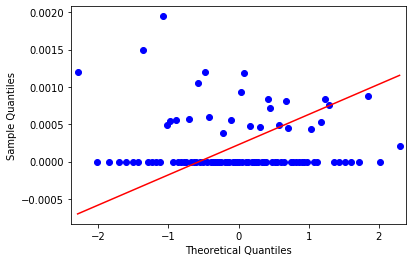

In [3]:
#plot both datasets using qqplot to check for normality
qqplot(Chrome, line='s')
pyplot.show()

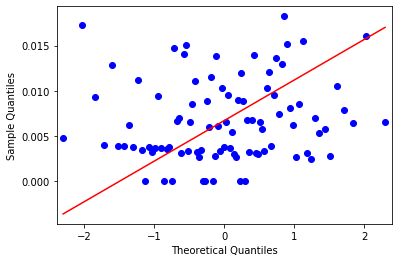

In [4]:
qqplot(Safari, line='s')
pyplot.show()

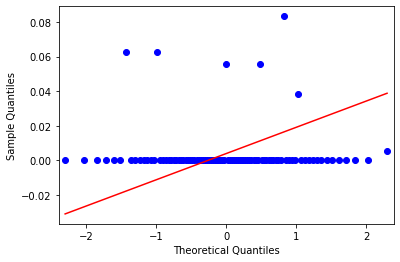

In [5]:
qqplot(Ie, line='s')
pyplot.show()

### Not all datasets look normal since the firsts falls off the qq plot

In [6]:
names = ["Chrome", "Safari", "Ie"]
for index, i in enumerate((Chrome, Safari, Ie)):
    stat, p = shapiro(i)
    print(names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Chrome
Statistics=0.628, p=0.000
Sample does not look Gaussian (reject H0)
Safari
Statistics=0.938, p=0.000
Sample does not look Gaussian (reject H0)
Ie
Statistics=0.282, p=0.000
Sample does not look Gaussian (reject H0)


### Since not all datasets are normaly distributed non-parametric tests should be used.

In [7]:
#import Kruskal–Wallis test: Non parametric method for testing whether samples originate from the same distribution. 
#Kruskal-Wallis can accommodate more than two groups, extending Wilcoxon-Mann-Whitney.
from scipy.stats import kruskal

In [8]:
stat, p = kruskal(Chrome, Safari, Ie)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:    
    print('The difference between the datasets is not significant (fail to reject H0)')
else:
    print('The difference between the datasets is significant (reject H0)')

Statistics=155.610, p=0.000
The difference between the datasets is significant (reject H0)


### We conclude that there is significant difference between the datasets

### Further investigation can be made using the Wilcoxon-Mann-Whitney (WMW) rank sum test in each pair of the datasets

In [9]:
#import ranksums (Wilcoxon-Mann-Whitney (WMW) rank sum test) to test wether the difference between the two datasets is significant
from scipy.stats import ranksums

### Chrome against Safari

In [10]:
#Chrome against Safari
stat, p = ranksums(Chrome,Safari)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The difference between the two datasets is not significant (fail to reject H0)')
else:
    print('The difference between the two datasets is significant (reject H0)')

Statistics=-10.323, p=0.000
The difference between the two datasets is significant (reject H0)


### Chrome against Ie

In [11]:
#Chrome against Ie
stat, p = ranksums(Chrome,Ie)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The difference between the two datasets is not significant (fail to reject H0)')
else:
    print('The difference between the two datasets is significant (reject H0)')

Statistics=2.295, p=0.022
The difference between the two datasets is significant (reject H0)


### Safari against Ie

In [12]:
Ie#Safari against Firefox
stat, p = ranksums(Safari,Ie)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The difference between the two datasets is not significant (fail to reject H0)')
else:
    print('The difference between the two datasets is significant (reject H0)')

Statistics=9.051, p=0.000
The difference between the two datasets is significant (reject H0)
